In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
#from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv("datos-new.csv")
data.head()

T.H.I   T.F.E   Tobacco  I.H.R.V  MCareExp  Tra.Exp  G.F.G.E  H.H.Age  \
0  936116  204969    Smoker    90000      3469    50448        0       42   
1  100365   50545    Smoker     4500       470     2100        0       40   
2  236605   74240  NoSmoker    90000       545     4032        0       76   
3  112447   57793    Smoker     7200      2320     2676        0       54   
4  402008   87578  NoSmoker        0       240    39960        0       35   

   Floor.Area  House.Age  ...  Electricity               Young.Members  \
0          24         25  ...           Si  between 5 and 17 years old   
1          50         14  ...           Si  between 5 and 17 years old   
2          77         20  ...           Si                 No children   
3          40         18  ...           Si  between 5 and 17 years old   
4          45         10  ...           Si                 No children   

     Roof   TenueStatus    TypeHousehold         Worker  \
0  Strong    Fully_Paid  Extended Family      Freelance   
1   Light    Fully_Paid    Single Family      Freelance   
2  Strong    Fully_Paid    Single Family  Civil_Servant   
3   Light  Partial_Paid  Extended Family      Freelance   
4  Strong    Fully_Paid  Extended Family       Employee   

             TypeBuilding   Walls Toilet            Water  
0            Single house  Strong   Good  Good conditions  
1            Single house   Light   Poor  Good conditions  
2            Single house  Strong   Good  Good conditions  
3            Single house  Strong   Good   Bad conditions  
4  Multi-unit residential  Strong   Good  Good conditions  

[5 rows x 44 columns]

para poder visualizar nuestro cluster jerárquico, debemos de trabajar en dos dimensiones. Por ello, a partir de aquí nos centraremos en nuestra variable Income y aquella variable más óptima según nuestro anterior análisis del data set con Random Forest: BYS (Bienes y servícios)

In [30]:
#SEparamos nuestras variables a utilizar del resto 

y = data[['T.H.I', 'BYS']]
y.head()


T.H.I     BYS
0  936116  314680
1  100365   33572
2  236605  137586
3  112447   25505
4  402008  164540

In [11]:
data.shape #our data contains 7001 records and 44 atributes

(7001, 44)

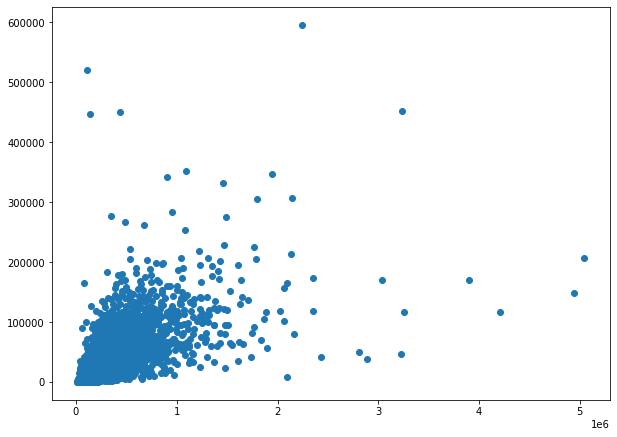

In [23]:
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(y['T.H.I'],y['BYS'])

plt.show()

## Explicación del algoritmo

BUscamos los dos puntos que están más cerca entre ellos, basándonos en la distancia euclídea que nos generará un cluster. Luego, el cluster formado se agrupará con su cluster más cercano, volviendo a aplicar la distancia euclídea

la línea horizontal es nuestro límite para determinar el número de clusters, la cual define la distacia mínima necesaria para ser un cluster separado. si dibujamos la línea más abajo, el límite necesita de mayor número de clusters

la siguiente gráfica muestra que el `número óptimo de clusters serían 3`, ya que es donde nuestra línea roja horizontal se encontraría (que pase a través de la distancia más larga sin una línea horizontal)

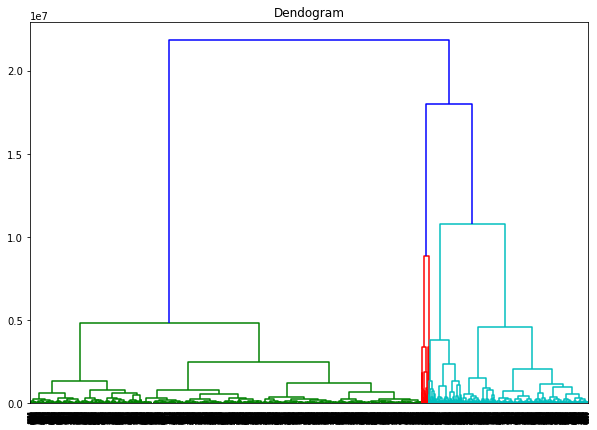

In [41]:
import scipy.cluster.hierarchy as shc

# Lo que vemos en la y es la distancia y en las x los samples de nuestro dataset

plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(y, method='ward'))

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [26]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(y)

array([0, 1, 1, ..., 1, 1, 1])

In [27]:
print(cluster.labels_)

[0 1 1 ... 1 1 1]


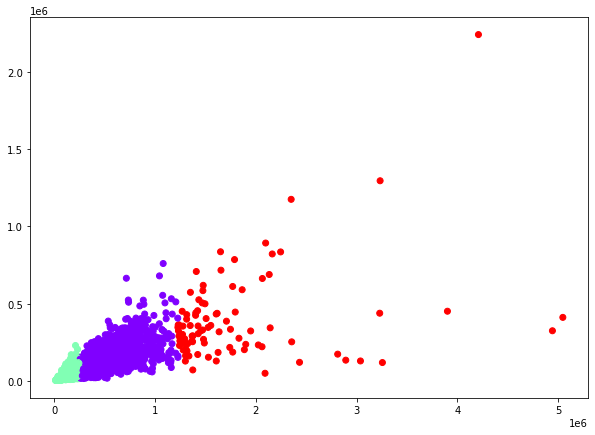

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(y['T.H.I'], y['BYS'], c=cluster.labels_, cmap='rainbow')